<h1>Problema<h1>

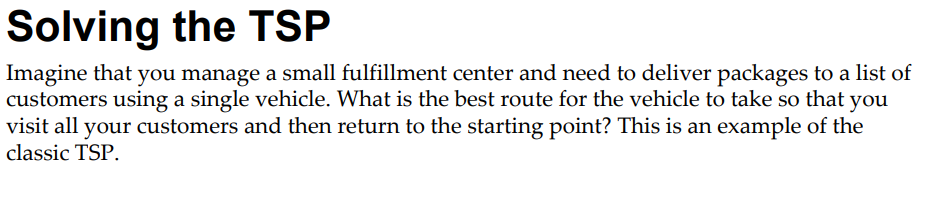

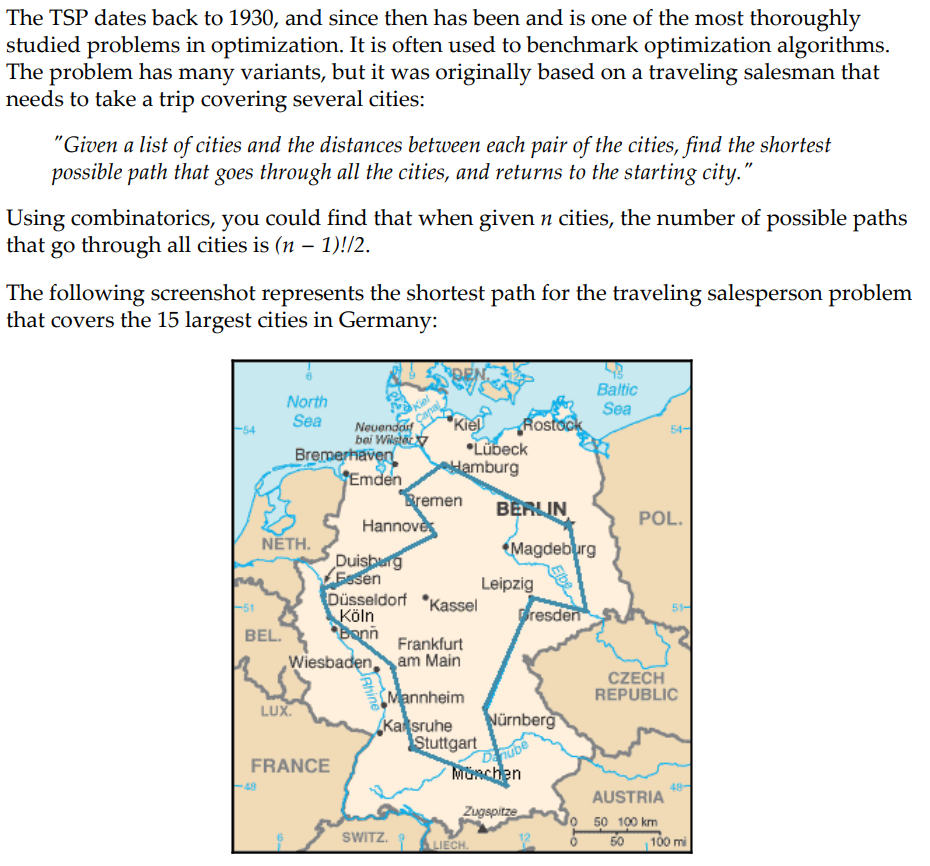

In [ ]:
!pip install deap
!pip install matplotlib
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 14.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h1>Taking data

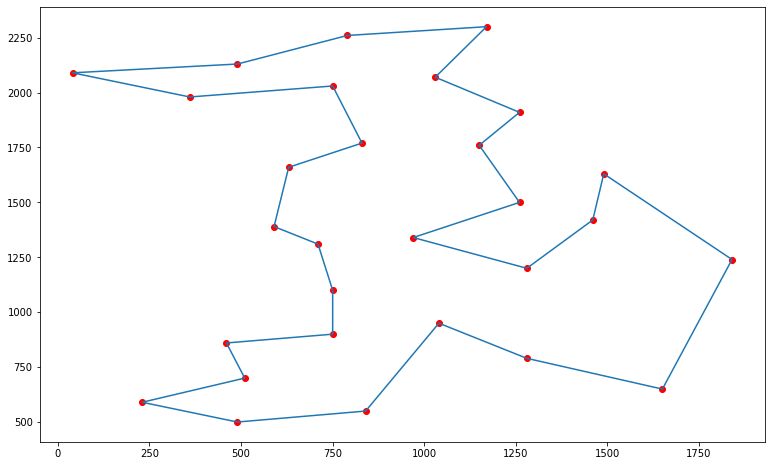

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.000000,529.528092,1158.015544,771.751255,482.597140,332.415403,1217.415295,364.005494,616.116872,629.364759,...,671.192968,320.156212,1422.392351,864.002315,282.311884,978.672570,756.637298,460.108683,186.010752,820.060973
1,529.528092,0.000000,730.068490,572.712843,388.973007,572.800140,1435.444182,860.523097,620.966988,359.026461,...,272.946881,228.254244,1168.417734,1280.820050,650.000000,1086.001842,490.407993,864.002315,677.790528,418.688428
2,1158.015544,730.068490,0.000000,1218.277472,712.530701,990.202000,2160.023148,1521.216618,769.025357,1028.250942,...,890.224691,852.349693,1652.452722,1990.602924,1355.175265,1796.552254,451.774280,1570.127383,1233.207201,338.378486
3,771.751255,572.712843,1218.277472,0.000000,930.000000,1009.603883,1006.230590,910.219754,1160.689450,213.775583,...,331.209903,674.759216,653.911309,1098.954048,648.151217,614.003257,1062.308806,778.781099,957.183368,962.548700
4,482.597140,388.973007,712.530701,930.000000,0.000000,282.842712,1647.543626,841.189634,233.452351,721.110255,...,659.696900,272.029410,1551.934277,1346.179780,735.527022,1348.517705,278.567766,936.055554,523.927476,393.192065
5,332.415403,572.800140,990.202000,1009.603883,282.842712,0.000000,1549.451516,636.553219,306.104557,824.621125,...,809.938269,360.555128,1660.271062,1159.741350,614.654374,1304.185570,543.323108,779.358711,280.178515,676.017751
6,1217.415295,1435.444182,2160.023148,1006.230590,1647.543626,1549.451516,0.000000,992.975327,1825.294497,1148.564321,...,1292.749009,1388.092216,1169.658070,619.838689,935.200513,395.600809,1880.425484,793.095202,1318.976876,1852.835665
7,364.005494,860.523097,1521.216618,910.219754,841.189634,636.553219,992.975327,0.000000,941.753683,843.089556,...,931.450482,674.685112,1508.940025,524.022900,264.196896,865.852181,1118.033989,212.132034,362.353419,1182.962383
8,616.116872,620.966988,769.025357,1160.689450,233.452351,306.104557,1825.294497,941.753683,0.000000,953.362470,...,892.692556,491.629942,1785.385113,1463.864748,893.588272,1549.516053,326.955654,1074.476617,586.003413,513.127664
9,629.364759,359.026461,1028.250942,213.775583,721.110255,824.621125,1148.564321,843.089556,953.362470,0.000000,...,144.222051,475.394573,839.344983,1132.166066,581.893461,771.556868,848.999411,758.023746,813.941030,755.910048


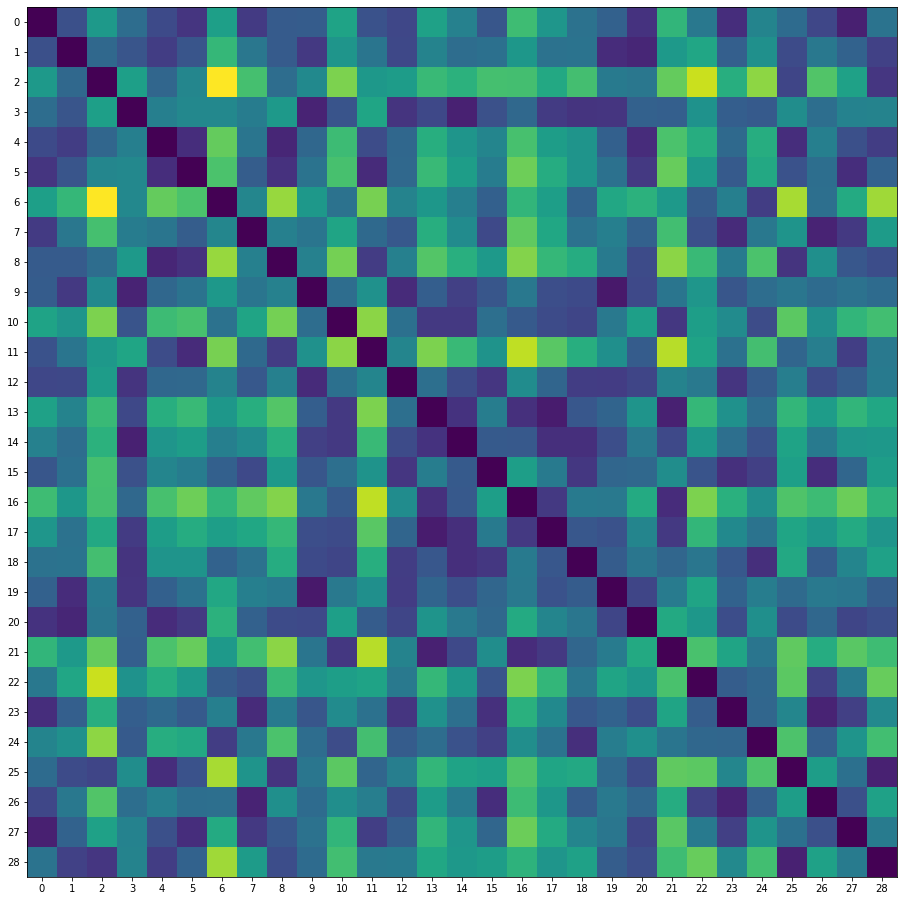

In [ ]:
def take_data(NAME="bayg29.tsp"):
  """link for more problems http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/"""
  import pandas as pd
  import requests
  from bs4 import BeautifulSoup
  import re
  from pprint import pprint
  import matplotlib.pyplot as plt

  # Taking data
  PROBLEM_NAME = NAME
  url = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/"
  req = requests.get("http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/bayg29.tsp")
  site = BeautifulSoup(req.content, "html.parser").text
  informations = re.findall(r"^\s+\d+\s+\d+.0\s+\d+.0$", site, flags=re.MULTILINE)

  # Taking cities and points
  cities = []
  for i in informations:
    i = list(map(lambda x: int(float(x)), i.strip().split()))
    cities.append(i)
  #pprint(cities)

  # Plotting
  x = [i[1] for i in cities]
  y = [i[2] for i in cities]
  plt.figure(figsize=(13,8))
  plt.scatter(x, y, marker='o', color="red")
  Optimal_solution =  [0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23]
  Optimal_solution.append(Optimal_solution[0])
  x_new = [cities[i][1] for i in Optimal_solution]
  y_new = [cities[i][2] for i in Optimal_solution]
  plt.plot(x_new, y_new)
  plt.show()

  # Making the matrix of distances
  matrix = [[0 for i in range(len(cities))] for i in range(len(cities))]
  for y in range(len(matrix)):
    for x in range(len(matrix[0])):
      matrix[y][x] = ((cities[y][1]-cities[x][1])**(2) + (cities[y][2]-cities[x][2])**2)**(1/2)


  df_matrix = pd.DataFrame(matrix, columns=[i for i in range(len(cities))])
  display(df_matrix)
  """for i in matrix:
    print(i, "\n")"""

  plt.figure(figsize=(16,16))
  plt.imshow(matrix)
  plt.xticks(ticks=[i for i in range(len(cities))])
  plt.yticks(ticks=[i for i in range(len(cities))])
  plt.show()
  return cities, matrix

cities, matrix = take_data()

<h1>Solving the problem

In [ ]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


# STRUCTURE
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("chromosomeStruct", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


# CHROMOSOME [ 0 2 1 4 3 ... ] SAMPLE OF NON-REPEATED INTEGERS
CHROMOSOME_LENGTH = len(cities)
def chromosome(length): # for this problem we will create the entire chromosome at once
  chromosome = random.sample([i for i in range(length)], length)
  return chromosome
toolbox.register("chromosome", chromosome, length=CHROMOSOME_LENGTH)
toolbox.register("individual", tools.initIterate, creator.chromosomeStruct, toolbox.chromosome)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.individual)


# GENETIC OPERATORS
def fitness_function(individual):
  global matrix
  value = matrix[individual[-1]][individual[0]]
  for i in range(len(individual)-1):
    value += matrix[individual[i]][individual[i+1]]
  return value,
toolbox.register("evaluate", fitness_function)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=2/CHROMOSOME_LENGTH)


# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("min", np.min)
stats.register("max", np.max)
#stats.register("mean", np.mean)
#stats.register("std", np.std)
def best_solution_proximity(fitness_values_list):
  minimal = min(fitness_values_list)[0]
  best = [0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23]
  best_score = fitness_function(best)[0]
  return best_score/minimal
stats.register("best solution proximity", best_solution_proximity)
hof = tools.HallOfFame(3)


# CONTROL PANEL
POPULATION_SIZE = 1000
PROBABILITY_CROSSOVER = 0.8
PROBABILITY_MUTATION = 0.2
MAX_GENERATIONS = 250 # (stopping condition)
#random.seed(42)

# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, log = algorithms.eaSimple(population,
                                  toolbox,
                                  cxpb=PROBABILITY_CROSSOVER,
                                  mutpb=PROBABILITY_MUTATION,
                                  stats=stats,
                                  ngen=MAX_GENERATIONS,
                                  halloffame=hof,
                                  verbose=True)

gen	nevals	min  	max    	best solution proximity
0  	1000  	20588	31454.6	0.440749               
1  	855   	18452.4	30217.5	0.491759               
2  	818   	18226.8	29426.4	0.497846               
3  	863   	17935  	28789.3	0.505945               
4  	821   	17790.5	28592  	0.510055               
5  	829   	17476.7	29512  	0.519213               
6  	856   	17476.7	29001.8	0.519213               
7  	851   	17739.9	28535.5	0.51151                
8  	842   	14769.8	28960.8	0.614373               
9  	838   	16846  	28270.6	0.538652               
10 	820   	16148.4	27752.8	0.561924               
11 	821   	15552.5	28394.3	0.583454               
12 	840   	14308.6	28617.7	0.634176               
13 	830   	15080.9	26831.8	0.601697               
14 	854   	14241  	29753.3	0.637187               
15 	839   	14247.1	27208.4	0.636913               
16 	819   	14247.1	26448.8	0.636913               
17 	797   	14247.1	25610  	0.636913               
18 	800   	13732.4	27290.5	0.660784

<h1>Visualization

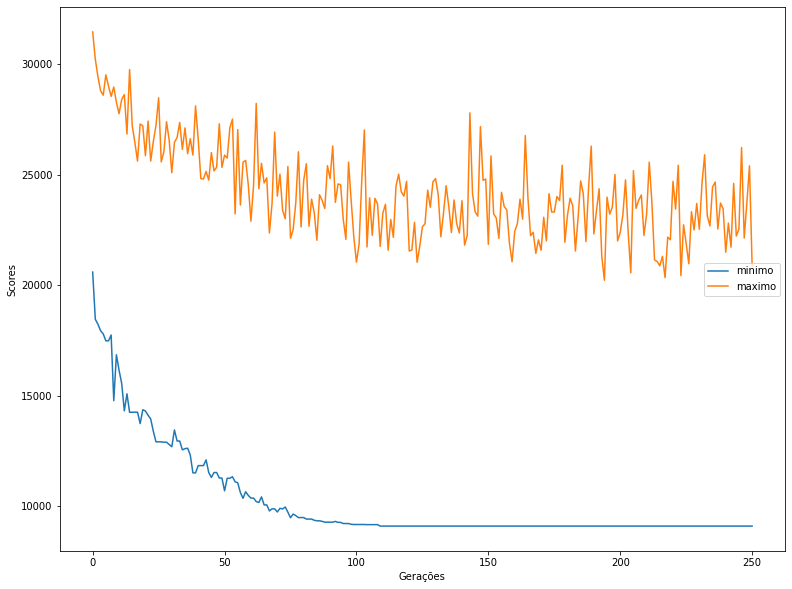

In [ ]:
import matplotlib.pyplot as plt

# taking data
#y_mean = log.select("mean")
y_min = log.select("min")
y_max = log.select("max")
#y_std = log.select("std")
x_gen = log.select("gen")


#plotting
plt.figure(figsize=(13,  10))
#plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
plt.plot(x_gen, y_max, label="maximo")
#plt.plot(x_gen, y_std, label="std")

plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)

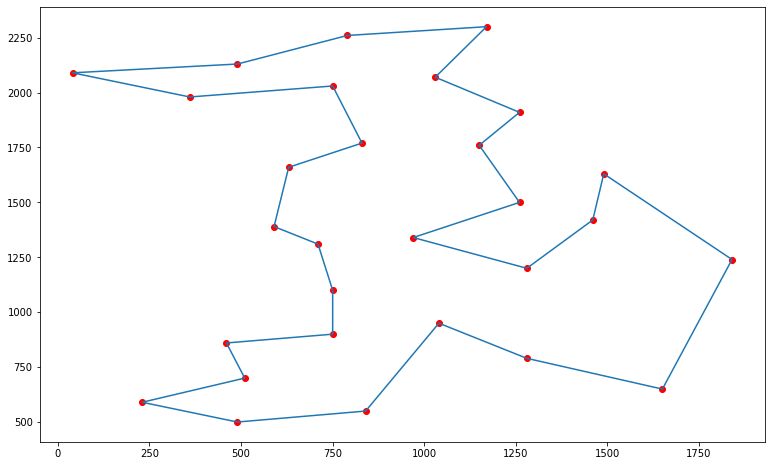

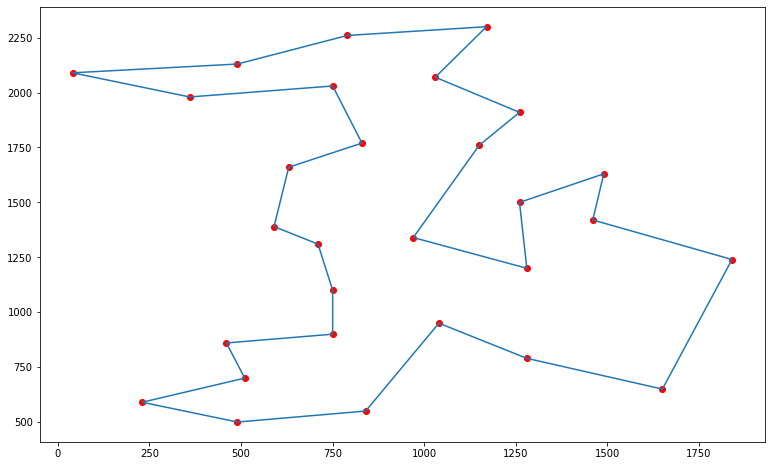

In [ ]:
# Plotting best solution
x = [i[1] for i in cities]
y = [i[2] for i in cities]
plt.figure(figsize=(13,8))
plt.scatter(x, y, marker='o', color="red")
Optimal_solution =  [0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23]
Optimal_solution.append(Optimal_solution[0])
x_new = [cities[i][1] for i in Optimal_solution]
y_new = [cities[i][2] for i in Optimal_solution]
plt.plot(x_new, y_new)
plt.show()

# Plotting my solution
x = [i[1] for i in cities]
y = [i[2] for i in cities]
plt.figure(figsize=(13,8))
plt.scatter(x, y, marker='o', color="red")
Optimal_solution =  hof[0]
Optimal_solution.append(Optimal_solution[0])
x_new = [cities[i][1] for i in Optimal_solution]
y_new = [cities[i][2] for i in Optimal_solution]
plt.plot(x_new, y_new)
plt.show()

<h1>Trying to get the best solution


In [ ]:
from deap import creator, base, tools, algorithms
import random
import numpy as np

# INICIALIZATION
black_list = []
hof = []

for interations in range(10):
  # ITERATIVE METHOD
  for i in hof:
    black_list.append(i)


  # STRUCTURE
  creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
  creator.create("chromosomeStruct", list, fitness=creator.FitnessMin)
  toolbox = base.Toolbox()


  # CHROMOSOME [ 0 2 1 4 3 ... ] SAMPLE OF NON-REPEATED INTEGERS
  CHROMOSOME_LENGTH = len(cities)
  def chromosome(length): # for this problem we will create the entire chromosome at once
    chromosome = random.sample([i for i in range(length)], length)
    return chromosome
  toolbox.register("chromosome", chromosome, length=CHROMOSOME_LENGTH)
  toolbox.register("individual", tools.initIterate, creator.chromosomeStruct, toolbox.chromosome)
  toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.individual)


  # GENETIC OPERATORS
  def fitness_function_altered(individual):
    global matrix
    global black_list
    if individual in black_list:
      return 100000,
    value = matrix[individual[-1]][individual[0]]
    for i in range(len(individual)-1):
      value += matrix[individual[i]][individual[i+1]]
    return value,
  toolbox.register("evaluate", fitness_function_altered)
  toolbox.register("select", tools.selTournament, tournsize=5)
  toolbox.register("mate", tools.cxOrdered)
  toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.5/CHROMOSOME_LENGTH)


  # STORING THE INFORMATION
  stats = tools.Statistics(lambda population: population.fitness.values)
  stats.register("min", np.min)
  stats.register("max", np.max)
  #stats.register("mean", np.mean)
  #stats.register("std", np.std)
  def best_solution_proximity(fitness_values_list):
    minimal = min(fitness_values_list)[0]
    best = [0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23]
    best_score = fitness_function(best)[0]
    return best_score/minimal
  stats.register("best solution proximity", best_solution_proximity)
  hof = tools.HallOfFame(8)


  # CONTROL PANEL
  POPULATION_SIZE = 1000
  PROBABILITY_CROSSOVER = 0.8
  PROBABILITY_MUTATION = 0.2
  MAX_GENERATIONS = 100 # (stopping condition)
  random.seed(42)

  # EVOLVING THE SOLUTION
  generationCounter = 0
  population = toolbox.PopulationCreator(n=POPULATION_SIZE)
  result, log = algorithms.eaSimple(population,
                                    toolbox,
                                    cxpb=PROBABILITY_CROSSOVER,
                                    mutpb=PROBABILITY_MUTATION,
                                    stats=stats,
                                    ngen=MAX_GENERATIONS,
                                    halloffame=hof,
                                    verbose=True)

# RESULT
for i in hof:
  black_list.append(i)
resultado = sorted(black_list, key=lambda x: fitness_function(x), reverse=False)
print(len(resultado))
print(resultado[0])
print(fitness_function(resultado[0]))

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'chromosomeStruct' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	min    	max    	best solution proximity
0  	1000  	21103.3	33962.4	0.429988               
1  	853   	19211.9	31064.5	0.472319               
2  	840   	18504.5	29530.1	0.490375               
3  	855   	17820.4	27935.3	0.5092                 
4  	852   	16614.3	26623.1	0.546165               
5  	831   	16319.2	28419.3	0.556042               
6  	834   	16403.9	25941.4	0.553169               
7  	845   	15264  	27842.7	0.594481               
8  	832   	15559.7	26932.2	0.583182               
9  	846   	14851.4	29168  	0.610996               
10 	854   	14386.3	25822  	0.630748               
11 	828   	13098.1	26259  	0.692782               
12 	845   	13941.3	26385.4	0.650883               
13 	828   	13451.4	25386.1	0.674589               
14 	842   	13430.3	24940.3	0.675649               
15 	833   	12452.4	25533.7	0.728706               
16 	832   	12452.4	25593.3	0.728706               
17 	830   	12017.5	24997.7	0.755076               
18 	835   	11945.4	24314.6	0.75

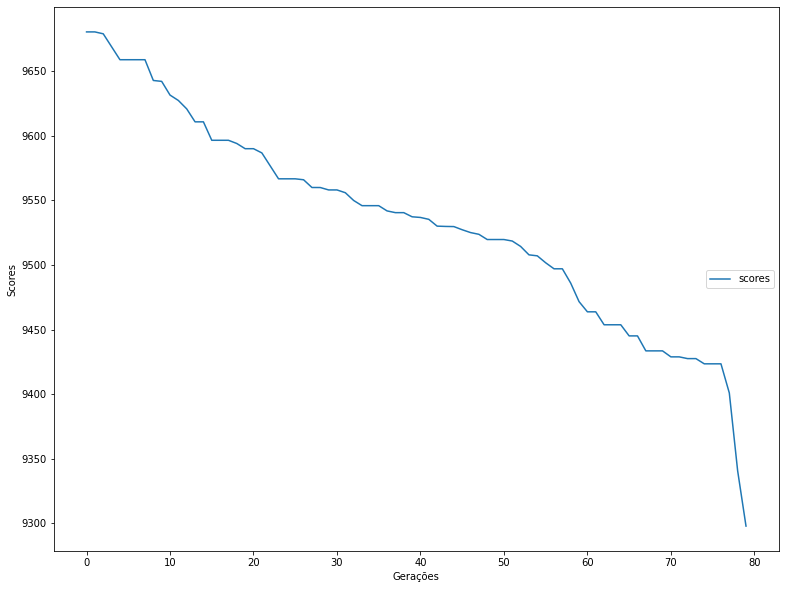

In [ ]:
import matplotlib.pyplot as plt

# taking data
x = [i for i in range(len(resultado))]
y = [fitness_function(i) for i in resultado[::-1] ]


#plotting
plt.figure(figsize=(13,  10))
plt.plot(x, y, label="scores")

plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)